In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('D:\ML\pima-indians-diabetes.csv')

In [3]:
data.head(2)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
data.iloc[:,-1]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [5]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [6]:
data.isnull().any().sum()

0

In [7]:
x=data.iloc[:,:-1]
y=data["class"]

# SPLIT

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

# LOGISTIK

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [12]:
model.intercept_

array([-5.05448348])

In [13]:
model.coef_

array([[ 9.42892587e-02,  2.55373153e-02, -1.98646721e-02,
        -1.53676522e-03, -6.44694374e-05,  5.63219234e-02,
         3.79751139e-01,  8.68644901e-03]])

In [14]:
model.score(x_train, y_train)

0.7746741154562383

In [15]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

# Metrices: Accuracy, recall, Precision

In [16]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predict)

array([[132,  14],
       [ 38,  47]], dtype=int64)

In [17]:
metrics.accuracy_score(y_test, y_predict)

0.7748917748917749

In [18]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test, y_predict).ravel()

In [19]:
print("True Neg",tn)
print("False Pos",fp)
print("False Neg",fn)
print("True Pos",tp)

True Neg 132
False Pos 14
False Neg 38
True Pos 47


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [21]:
from sklearn.metrics import precision_score

In [22]:
y_pred_train=model.predict(x_train)
print("precision_scorefor for train:",precision_score(y_train,y_pred_train))
y_pred_test=model.predict(x_test)
print("precision_score for test:",precision_score(y_test,y_pred_test))

precision_scorefor for train: 0.7384615384615385
precision_score for test: 0.7704918032786885


In [23]:
from sklearn.metrics import recall_score
y_pred_train=model.predict(x_train)
print("recall_score for train:",recall_score(y_train,y_pred_train))
y_pred_test=model.predict(x_test)
print("recall_score for test:",recall_score(y_test,y_pred_test))

recall_score for train: 0.5245901639344263
recall_score for test: 0.5529411764705883


In [24]:
from sklearn.metrics import f1_score
print("f1_score for train:",f1_score(y_train,y_pred_train))
print("f1_score for test:",recall_score(y_test,y_pred_test))

f1_score for train: 0.6134185303514377
f1_score for test: 0.5529411764705883


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='class'>

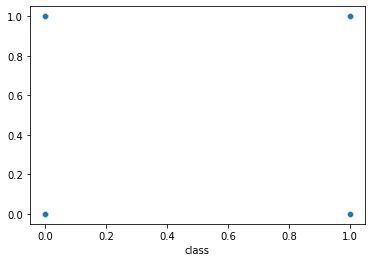

In [39]:
sns.scatterplot(x=y_test,y=y_predict)

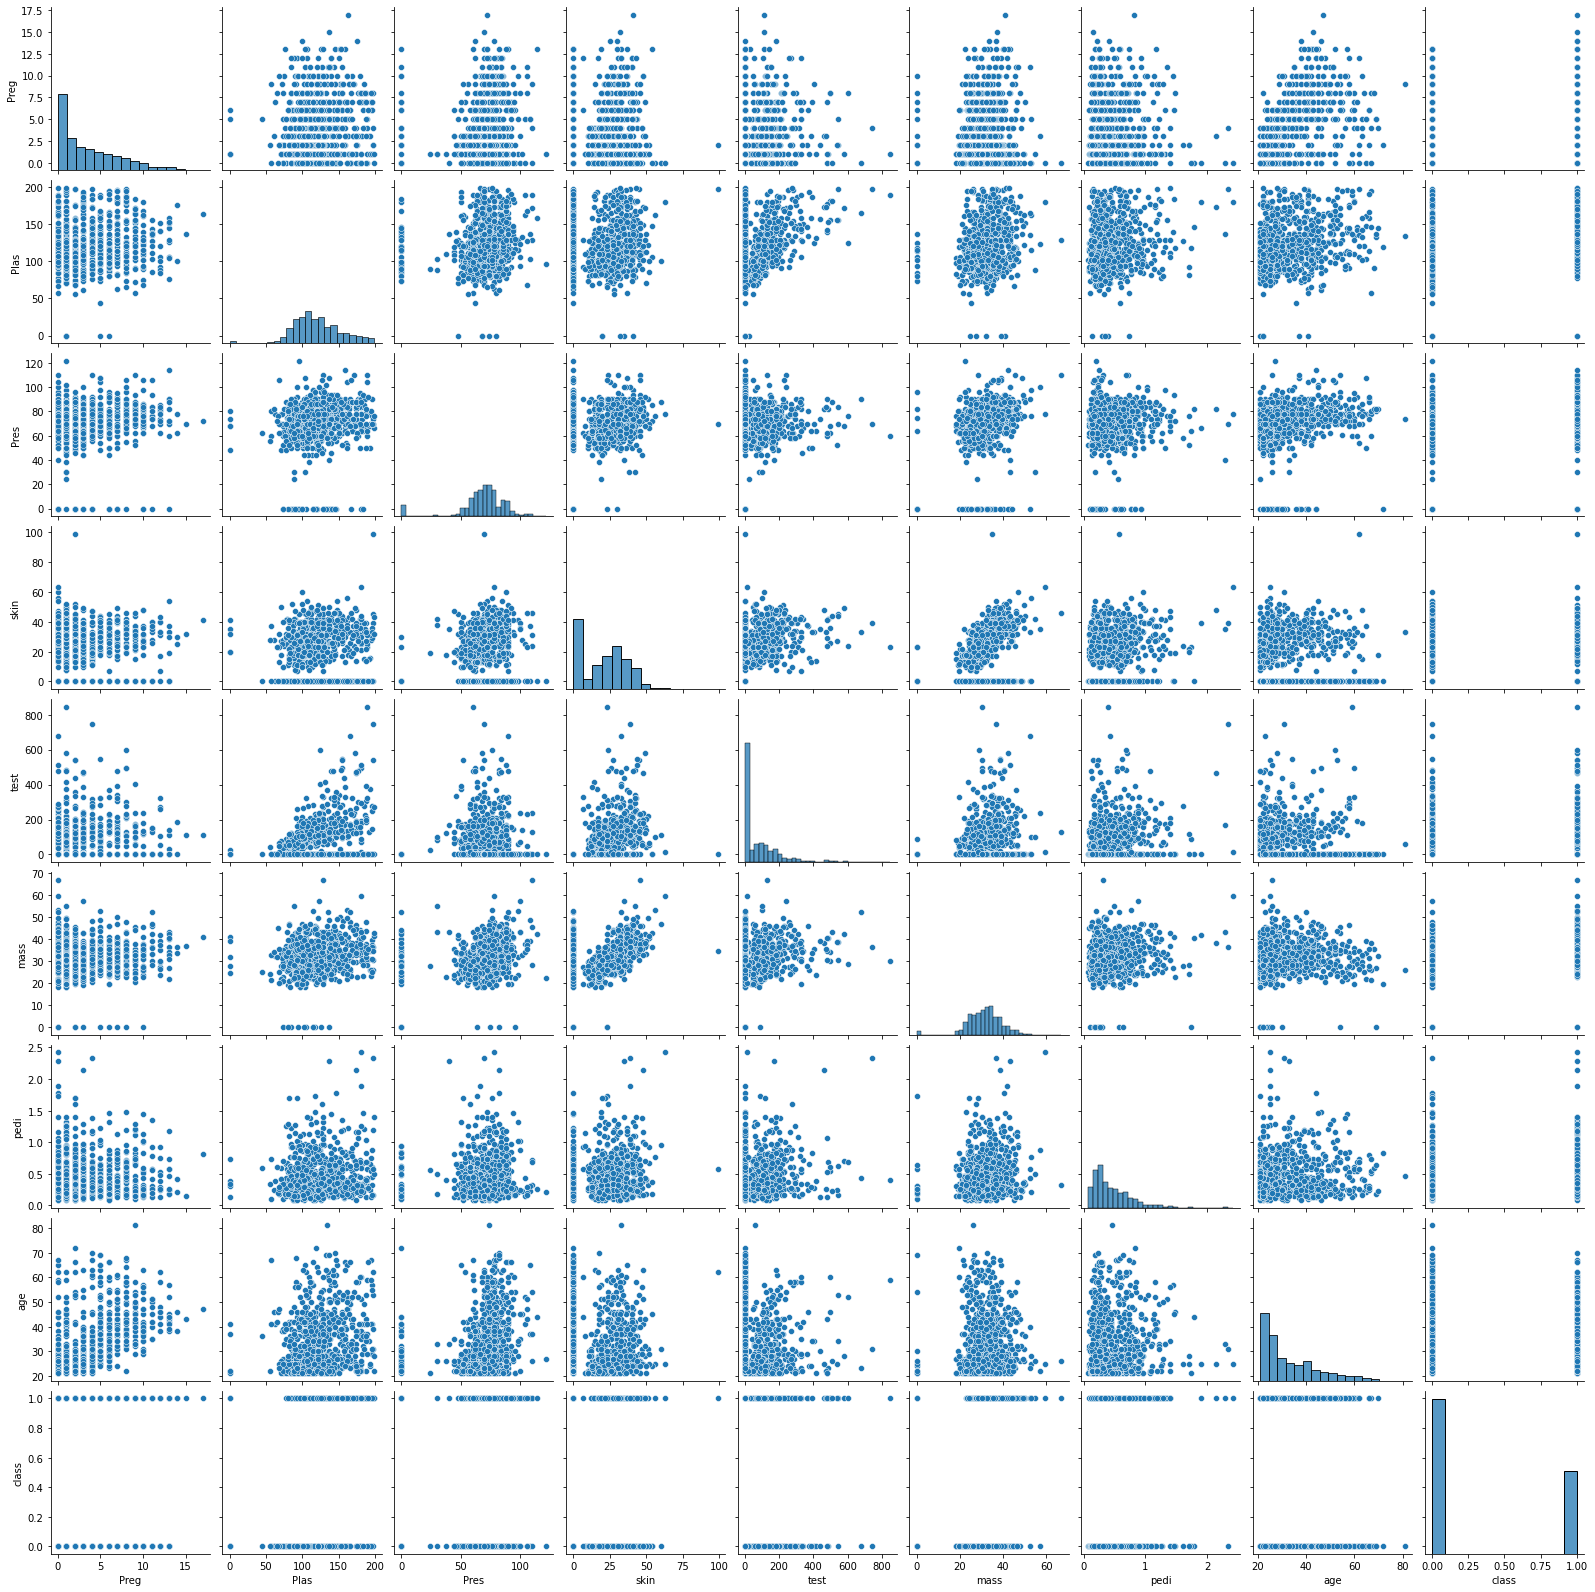

In [36]:
sns.pairplot(data)